# Recognising handwritten digits on MNIST Dataset using KNN

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

# Step 1:Data Preparation

In [9]:
df=pd.read_csv('C:\machine learning\mnist_train.csv\mnist_train.csv')

In [10]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.shape

(60000, 785)

In [12]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [13]:
data=df.values

In [14]:
print(type(data))

<class 'numpy.ndarray'>


In [15]:
x=data[:,1:]
y=data[:,0]

In [16]:
print(x.shape,y.shape)

(60000, 784) (60000,)


In [17]:
split=int(0.8*x.shape[0])

In [18]:
print(split)

48000


In [19]:
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:,:]
y_test=y[split:]

In [20]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


# Step 2: KNN

In [29]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,querypoint,k=5):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

# visualize some samples

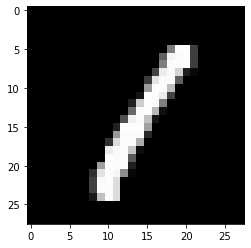

1


In [22]:
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawimg(x_train[3])
print(y_train[3])

# Step 3: Make Predictions

In [33]:
pred=knn(x_train,y_train,x_test[8])
print(int(pred))

2


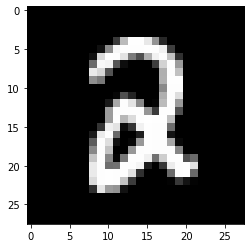

2


In [34]:
drawimg(x_test[8])
print(y_test[8])

In [35]:
pred=knn(x_train,y_train,x_test[287])
print(int(pred))

0


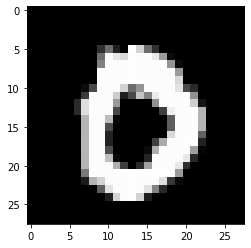

0


In [36]:
drawimg(x_test[287])
print(y_test[287])

In [39]:
pred=knn(x_train,y_train,x_test[127])
print(int(pred))

1


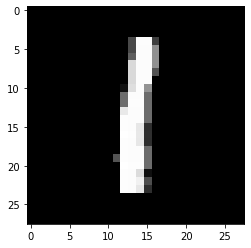

1


In [41]:
drawimg(x_test[127])
print(y_test[127])

In [46]:
pred=knn(x_train,y_train,x_test[5])
print(int(pred))

6


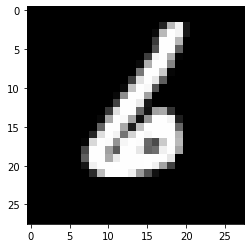

6


In [47]:
drawimg(x_test[5])
print(y_test[5])